In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2024-01-19 09:07:19.245502: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 09:07:19.245808: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 09:07:19.663356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 09:07:20.233264: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-19 09:07:24.037765: W tensorflow/comp

In [2]:
model_resnet57_multi=tf.keras.models.load_model("/users/PLS0150/arnobrahee/Masrur/ML_CODES/X_RAY_BONE_FRACTURE_CLASSIFICATION/UNTRAIN_MODEL/NN_model_RESNET_57.h5")

2024-01-19 09:07:38.697841: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
# Input image size (100x100 pixels with 3 color channels)
input_shape = (100, 100, 3)
num_classes = 13  # Number of output classes

# Load your dataset
saved_splittednpDATA_path = "/users/PLS0150/arnobrahee/Masrur/ML_CODES/X_RAY_BONE_FRACTURE_CLASSIFICATION/PROCESSED_DATA_SPLITED"
train_images = np.load(os.path.join(saved_splittednpDATA_path, 'train_images.npy'))
val_images = np.load(os.path.join(saved_splittednpDATA_path, 'val_images.npy'))
train_labels = np.load(os.path.join(saved_splittednpDATA_path, 'train_labels.npy'))
val_labels = np.load(os.path.join(saved_splittednpDATA_path, 'val_labels.npy'))

# Convert labels to one-hot encoded format for multi-class classification
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes)
val_labels_one_hot = tf.keras.utils.to_categorical(val_labels, num_classes=num_classes)

# Data augmentation for training data
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_datagen = datagen.flow(train_images, train_labels_one_hot, batch_size=32)

In [4]:
# Compile the model for multi-class classification
model_resnet57_multi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Train the model with your numpy arrays and data augmentation
history = model_resnet57_multi.fit(train_datagen,epochs=12,validation_data=(val_images, val_labels_one_hot),shuffle=True)

Epoch 1/12
463/463 [==============================] - 564s 1s/step - loss: 2.4660 - accuracy: 0.1828 - val_loss: 11.7787 - val_accuracy: 0.1663
Epoch 2/12
463/463 [==============================] - 551s 1s/step - loss: 2.2967 - accuracy: 0.2141 - val_loss: 2.6537 - val_accuracy: 0.1341
Epoch 3/12
463/463 [==============================] - 547s 1s/step - loss: 2.2540 - accuracy: 0.2300 - val_loss: 2.8992 - val_accuracy: 0.1582
Epoch 4/12
463/463 [==============================] - 552s 1s/step - loss: 2.2181 - accuracy: 0.2495 - val_loss: 3.2600 - val_accuracy: 0.1130
Epoch 5/12
463/463 [==============================] - 552s 1s/step - loss: 2.1661 - accuracy: 0.2678 - val_loss: 2.3693 - val_accuracy: 0.2326
Epoch 6/12
463/463 [==============================] - 552s 1s/step - loss: 2.1055 - accuracy: 0.2909 - val_loss: 2.6965 - val_accuracy: 0.2439
Epoch 7/12
463/463 [==============================] - 553s 1s/step - loss: 2.0297 - accuracy: 0.3231 - val_loss: 2.9674 - val_accuracy: 0.156

In [9]:
# Save training and validation loss values
np.save("/users/PLS0150/arnobrahee/Masrur/ML_CODES/X_RAY_BONE_FRACTURE_CLASSIFICATION/DATA_VALS/train_loss.npy", history.history['loss'])
np.save("/users/PLS0150/arnobrahee/Masrur/ML_CODES/X_RAY_BONE_FRACTURE_CLASSIFICATION/DATA_VALS/val_loss.npy", history.history['val_loss'])

# Save training and validation accuracy values
np.save("/users/PLS0150/arnobrahee/Masrur/ML_CODES/X_RAY_BONE_FRACTURE_CLASSIFICATION/DATA_VALS/train_accuracy.npy", history.history['accuracy'])
np.save("/users/PLS0150/arnobrahee/Masrur/ML_CODES/X_RAY_BONE_FRACTURE_CLASSIFICATION/DATA_VALS/val_accuracy.npy", history.history['val_accuracy'])

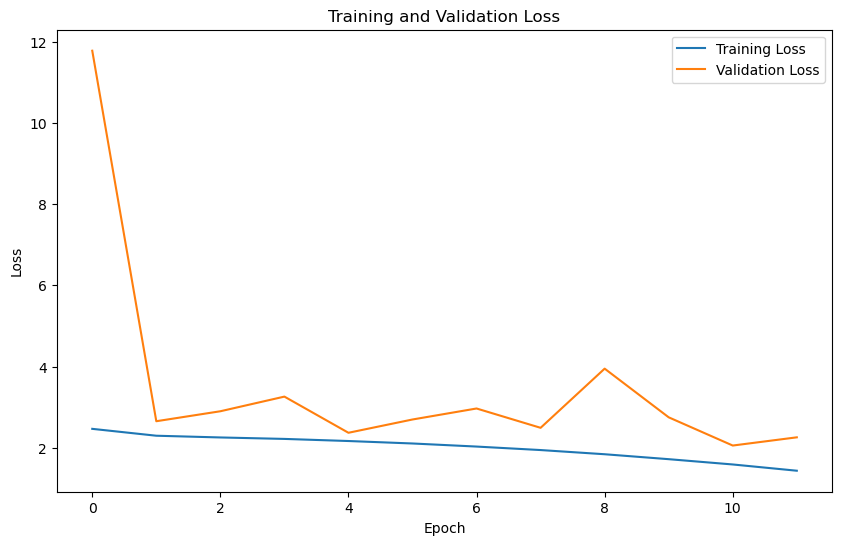

In [6]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

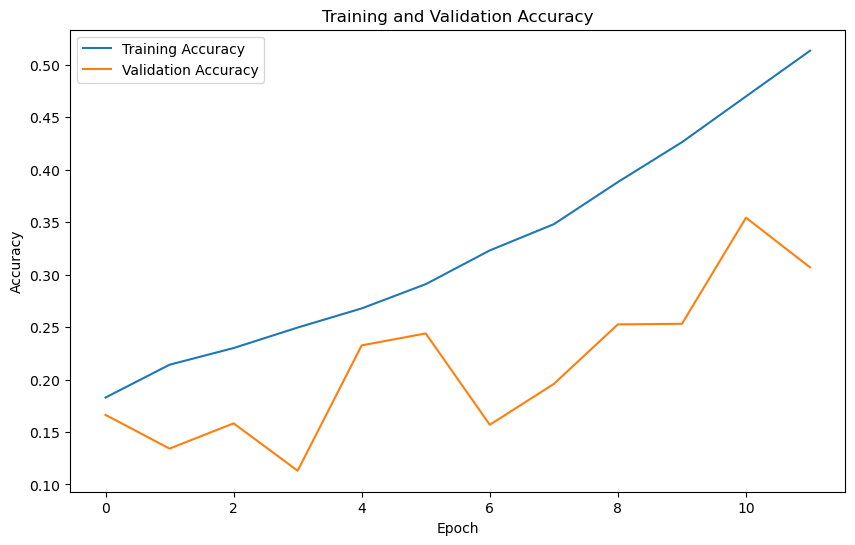

In [7]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
model_resnet57_multi.save("/users/PLS0150/arnobrahee/Masrur/ML_CODES/X_RAY_BONE_FRACTURE_CLASSIFICATION/TRAINED_MODEL/NN_model_RESNET_57_TRAINED.h5")

/users/PLS0150/arnobrahee/.conda/envs/torch/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
